# Neuron Model Project Overview

1. Create a passive cable model using the neural parameters described in the McIntyre, Richardson, and Grill Paper provided in the reading. Your model shall consist of three dendrites connected to a cell body. The cell body is assumed to be a sphere with diameter 50 $\mu$m, the dendrites are cylinders with the following diameters and lengths

  D1: 
    
    * L=1mm
    * d = 10 $\mu$m
    
  D2: 
    
    * L = 1mm
    * d = 20 $\mu$m
    
  D3:
    
    * L=300 $\mu$m
    * d = 20 $\mu$m
    
  Show the change in potential at the cell body as a function of an injected square pulse of cathodal (depolarizing) current under the conditions listed below. After all of these modeling exercises, describe the influence of the diameter and length of the dendrites on processing of synaptic information.
    
   * Same, single pulse input in the middle of each of the respective dendrites.
   * Same, single pulse input equidistant from the cell body for each dendrite.
   * Multiple input pulses of current at equidistance from the cell body for each dendrite for several frequencies.
    
2. Add an active axon to your model. Double the sodium channel density in the initial axon hillock segment of the axon. Repeat the scenarios above and describe the effects on the axon. Find input pulses that drive the axon to fire an action potential. The axon should be 20 $\mu$m in diameter, is myelinated, and should consist of 20 nodes after the initial segment.
        
3. Rather than injecting a current internally at the node of the dendrite, add a synaptic current across the membrane. Use a single tau model and set tau to different values ranging from 50 $\mu$s and th emaximum synaptic conductance initially equal tot he sodium conductance and then varied higher and lower. Explore spatial and temporal summation using your model. Vary the frequency of input pulses that are individually too small to cause axon excitement.

4. Change the diameters of the cell body from 30 $\mu$m to 100 $\mu$m with active axons changing in proportion from 8 $\mu$m to 20 $\mu$m. Describe the impact of the size change on the dendritic input and on the axon excitation. For a fixed size, examine the effect of increasing intermodal spacing from 100*D to 500*D on action potential propagation.

## Math

In order to represent the neuron, some background must be understood first.

### Nernst potential

The nernst potential describes what is known as the reverse potential. The reverse potential is where the transfer of an ion across a membrane is zero, as the amount of ion crossing the membrane due to diffusion is equal to the amount crossing due to the potential difference. The nernst potential is governed by the equation:

$$V_{ion} = \frac{RT}{zF} \ln \left( \frac{[ion]_{out}}{[ion]_{in}} \right)$$

Where

$$V_{ion} = V_{in} - V_{out}$$

$R$ is the gas constant 8.314 J/K/Mol

$T$ is temperature in kelvin

$z$ is the valence of the ion

$F$ is Faradays constant 96,485 C/mol

Given $T$ is 37 C, then 

$$V_{ion} = \frac{26.7}{z} \ln \left( \frac{[ion]_{out}}{[ion]_{in}} \right)$$
$$V_{ion} = \frac{61.5}{z} \log \left( \frac{[ion]_{out}}{[ion]_{in}} \right)$$

### GHK equation

When multiple ions are involved in the diffusion, the following relation occurs:

$$V_{GHK} = \frac{RT}{F} \times \ln \left[ \frac{\sum_{+ions} P_{ion} [ion^+]_{out} + \sum_{-ions} P_{ion} [ion^-]_{in}}{\sum_{+ions}P_{ion}[ion^+]_{in} + \sum_{-ions} P_{ion}[ion^-]_{out}}\right]$$

where $P_{ion}$ is the membrane permiability of that particular ion.

### Passive Cable equation

The passive cable equation is derived by assuming the dendrite is a cylinder. It assumes that all the ion channels on the membrane can be represented by a single resistor. $\Delta x$ from the integration actually gets factored out and becomes a partial derivative term for the external voltage.

$$V_m + \tau_m \frac{\partial V_m}{\partial t} - \lambda^2 \frac{\partial^2 V_m}{\partial x^2} - i_{inj} = \lambda^2 \frac{\partial^2 V_e}{\partial x^2}$$

$$\tau_m = r_m c_m$$
$$\lambda = \frac{r_m}{r_a}$$

The cable equation represents the relationship between the membrane voltage, the external voltage, and any injected current.

## Conversion to code:

The compartment model discretizes the continuous cable model by discrete steps for a compartment $j$, and assuming that the external voltage, $V_e$ is zero, we get the following equation:

$$\frac{V_j}{R_m} + C_m \frac{d V_j}{d t} -  \frac{V_{j+1} - 2V_j + V_{j-1}}{r_a \Delta x^2} - i_{inj} = 0$$

Next you can generalize that the voltages of each compartment are related by different $r_a$s.

$$\frac{V_j}{R_m} + C_m \frac{d V_j}{d t} +  \frac{V_j - V_{j+1}}{0.5\cdot(R_{a,j}+R_{a,j+1})} +\frac{V_j - V_{j-1}}{0.5\cdot(R_{a,j}+R_{a,j-1})} - i_{inj} = 0$$

Where
$$R_m =\frac{r_m}{\Delta x}$$
$$C_m =c_m\Delta x$$
$$R_a =r_a\Delta x$$

You can rearrange the equation to get the following:

$$\frac{d V_j}{d t} = \frac{1}{C_m}\left[-\left(\frac{\Delta x}{r_m} + \frac{1}{0.5 \cdot (R_{a,j} + R_{a,j+1})} + \frac{1}{0.5 \cdot (R_{a,j} + R_{a,j-1})} \right)V_j + \left(\frac{1}{0.5\cdot(R_{a,j}+R_{a,j+1})}\right)V_{j+1}+ \left(\frac{1}{0.5\cdot(R_{a,j}+R_{a,j-1})}\right)V_{j-1} + i_{inj}\right]$$

Which can be rearranged into the following matrix:

$$
\begin{bmatrix}
\frac{d V_{j}}{dt} \\
\frac{d V_{j+1}}{dt} \\
\frac{d V_{j+2}}{dt} \\
\frac{d V_{j+3}}{dt} \\
\frac{d V_{j+4}}{dt} \\
\vdots
\end{bmatrix} 
= 
\frac{1}{C_m}\left(
A\begin{bmatrix}
V_j \\
V_{j+1} \\
V_{j+2} \\
V_{j+3} \\
V_{j+4} \\
\vdots
\end{bmatrix}
+
\begin{bmatrix}
i_{inj,j} \\
i_{inj,j+1} \\
i_{inj,j+2} \\
i_{inj,j+3} \\ 
i_{inj,j+4} \\
\vdots
\end{bmatrix}
\right)
$$

$$d\overrightarrow{V} = \frac{1}{C_m}\left[ A\overrightarrow{V} + \overrightarrow{I}\right]$$

Where the matrix A has coefficients which represent the resistances connecting the nodes with the adjacent nodes. Assuming all voltages start from zero, we can integrate the system over time to produce the voltage output.

The code that serves for the framework of the project can be found in the following cells.

In [1]:
using Plots
pyplot(size = (1000,500))

Plots.PyPlotBackend()

In [21]:
module NeuronSim

using DifferentialEquations
# TYPE DEFINITIONS
# The generic compartment, which will be put into the compartment model
type Compartment
    parent_::Int
    children_::Vector{Int}
    id_::Int

    len_::Float64

    r_m_::Float64 # specific resistance per unit length
    R_m_::Float64

    c_m_::Float64
    C_m_::Float64

    r_a_::Float64
    R_a_::Float64

    V_m_::Float64
    V_i_::Float64
    I_inj_::Vector{Float64}
end

# The tree of compartments that represent the neuron
type NeuronModel
    nodes_::Vector{Compartment}
end


# TREE CREATION FUNCTIONS =========================================================================
# Generic tree data structure
# Adds a child compartment to the parent
# This data structure can represent an arbitrary dendritic tree

# Add the first node to the tree.
function AddRoot!(model::NeuronModel, root::Compartment)
    AddNodeById!(model, 0, root)
end

# Add a node by specifying who the parent is
function AddNode!(model::NeuronModel, parent::Compartment, child::Compartment)
    AddNodeById!(model, parent.id_, child)
end

# Add a node by specifying the ID of the parent
function AddNodeById!(model::NeuronModel, parent_id::Int, child::Compartment)
    push!(model.nodes_, child) #add child to list of nodes
    child.id_ = length(model.nodes_) # id is number of node
    if(parent_id > 0)
        child.parent_ = parent_id # set the parent
        push!(model.nodes_[parent_id].children_, child.id_) # push the child id onto the parent
    end
end

# MODEL CREATION FUNCTIONS =========================================================================
# Initializes and creates a model
function CreateModel()
    return NeuronModel([])
end

# Handy function to create a compartment
function CreateCompartment(;length::Float64=0.0, 
        r_m::Float64=0.0, 
        c_m::Float64=0.0, 
        r_a::Float64=0.0, 
        V_i::Float64=0.0,
        I_inj::Vector{Float64}=[0.0])
    
    return comp = Compartment(
        0,
        [],
        0,
        length,
        r_m,
        r_m/length,
        c_m,
        c_m*length,
        r_a,
        r_a*length*.5,
        V_i,
        V_i,
        I_inj)
end

function CreateSoma(;length::Float64=0.0, 
        r_m::Float64=0.0, 
        c_m::Float64=0.0, 
        r_a::Float64=0.0, 
        V_i::Float64=0.0,
        I_inj::Vector{Float64}=[0.0])
    
    return comp = Compartment(
        0,
        [],
        0,
        length,
        r_m,
        r_m,
        c_m,
        c_m,
        r_a,
        r_a*.5,
        V_i,
        V_i,
        I_inj)
end

# Handy function to create a bunch of linked compartments - these will be the dendrites
function CreateHomogenousCable(
        model::NeuronModel, num_segments::Int;
        parent_id::Int = 0,
        length::Float64=0.0, 
        r_m::Float64=0.0, 
        c_m::Float64=0.0, 
        r_a::Float64=0.0, 
        V_i::Float64=0.0,
        I_inj::Vector{Float64}=[0.0])
    
    head = 0
    tail = 0
    id = parent_id
    for i in 1:num_segments
        compartment = CreateCompartment(length=length, r_m=r_m, c_m=c_m, r_a=r_a, V_i=V_i, I_inj=I_inj)
        AddNodeById!(model, id, compartment)
        id = compartment.id_
        if i == 1
            head = id
        end
    end
    tail = id
    return (head,tail)
end

# SIMULATION FUNCTIONS ==============================================================================

# The structure matrix, A, is a matrix which encodes the linear relationships of the node voltages
# This can even be extended to branch points
function GenStructureMatrix(model::NeuronModel)
    structure_matrix = zeros(length(model.nodes_), length(model.nodes_))
    for node in model.nodes_
        # handle dependence on parents
        if node.parent_ > 0 
            parent = model.nodes_[node.parent_]
            
            structure_matrix[node.id_, node.parent_] =
                1.0/(node.R_a_ + parent.R_a_)
            
            structure_matrix[node.id_, node.id_] -= 
                1.0/(node.R_a_ + parent.R_a_)
        end
        
        # handle dependence on children
        for childid in node.children_
            child = model.nodes_[childid]
            structure_matrix[node.id_, child.id_] = 1.0/(node.R_a_ + child.R_a_)
            structure_matrix[node.id_, node.id_] -= 1.0/(node.R_a_ + child.R_a_)
        end
        
        # Handle the node itself
        structure_matrix[node.id_, node.id_] -= 1.0/(node.R_m_)
    end
    
    return structure_matrix
end

# Simulate the model over time, and return the dV, V, structure_matrix, b, and the solution object
# This function can specify what type of solver can be used.
# Since the compartment model is stiff, explicit solvers will not converge when using small parameters
function Simulate(model::NeuronModel, time::Vector{Float64}, delta_time::Float64;  solver=BuiltIn, scale_factor::Float64=1.0)
    structure_matrix = GenStructureMatrix(model)
    SanitizeCurrents(model, time)
    
    # initialize empty arrays for each variable
    dV = zeros(length(model.nodes_), length(time))
    V = zeros(length(model.nodes_), length(time))
    b = zeros(length(model.nodes_), length(time))
    
    V_i = map(x -> x.V_m_, model.nodes_)
    C_m = map(x -> x.C_m_, model.nodes_)
    #print(C_m)
    
    # Set the initial voltages
    V[:,1] = V_i
    
    
    # Create a matrix over blah
    for node in model.nodes_
        b[node.id_, :] = transpose(node.I_inj_)
    end
    
    # integrate over time
    return solver(dV, V, structure_matrix, b, C_m, scale_factor, delta_time, time) 
end

# Ensures that the injected currents over time are of proper size.
function SanitizeCurrents(model::NeuronModel, time::Vector{Float64})
    for node in model.nodes_
        if length(node.I_inj_) != length(time)
            node.I_inj_ = zeros(length(time))
        end
    end
end

# SOLUTION FUNCTIONS ===============================================================================

# Explicit forward euler method
function Euler(dV, V, A, b, C_m, scale_factor, delta_time, time)
    for index in 1:length(time)-1
    dV[:,index] = scale_factor*(A*V[:,index] + b[:,index])./C_m
    V[:,index+1] = dV[:,index].*delta_time + V[:,index]
    end
    return (dV, V, A, b, [])
end

# Explicit 2nd order Heun method
function Heun(dV, V, A, b, C_m, scale_factor, delta_time, time)
    for index in 1:length(time)-1
    k1 =  scale_factor*(A*V[:,index] + b[:,index])./C_m
    k2 =  scale_factor*(A*(V[:,index] + delta_time.*k1) + b[:,index+1])./C_m
    
    dV[:,index] = k1 + k2
    
    V[:,index+1] = V[:,index] + (delta_time/2.0).* dV[:,index]
    end
    return (dV, V, A, b, [])
end

# Explicit 4th order runge kutta method
function RK4(dV, V, A, b, C_m, scale_factor, delta_time, time)
    for index in 1:length(time)-1
    U  =   V[:,index]
    k1 =  scale_factor*(A*U + b[:,index])./C_m
    
    k2 =  scale_factor*(A*(U + .5*delta_time.*k1) + (b[:,index]+b[:,index+1])./2)./C_m
    
    k3 =  scale_factor*(A*(U + .5*delta_time.*k2) + (b[:,index]+b[:,index+1])./2)./C_m
    
    k4 =  scale_factor*(A*(U + delta_time.*k3) + b[:,index+1])./C_m
    
    dV[:,index] = k1 + 2.0*k2 + 2.0*k3 + k4
    
    V[:,index+1] = V[:,index] + (delta_time/6.0).* dV[:,index]
    end
    return (dV, V, A, b, [])
end

# Built in implicit equation solver
function BuiltIn(dV, V, A, b, C_m, scale_factor, delta_time, time)
    function f(t,u) 
        inj(x) = x < last(time) ?  b[:,round(Int,t/delta_time)+1] : 0.0
        return A*u + inj(t)
    end
    prob = ODEProblem(f, V[:,1], (first(time), last(time)))
    sol = solve(prob, alg_hints=[:stiff])
    return (dV, V, A, b, sol)
end


# DEBUGGING FUNCTIONS ===============================================================================
function PrintInfo(compartment::Compartment)
    print("Id: "); print(compartment.id_)
    print("\tParent: "); print(compartment.parent_)
    print("\tChildren: "); println(compartment.children_)
end

function PrintProperties(compartment::Compartment)
    print("Length: "); print(compartment.len_)
    print("\n")

    print("\tSpecific MRes: "); print(compartment.r_m_)
    print("\tTotal MRes: "); print(compartment.R_m_)
    print("\n")

    print("\tSpecific Cap: "); print(compartment.c_m_)
    print("\tTotal Cap: "); print(compartment.C_m_)
    print("\n")

    print("\tSpecific ARes: "); print(compartment.r_a_)
    print("\tTotal ARes: "); print(compartment.R_a_)
    print("\n")

    print("\tNodal Voltage: "); print(compartment.V_m_);
    print("\tInitial Voltage: "); println(compartment.V_i_);
    print("\n")
end
end
# ===================================================================================================

function GenRange(start, finish)
    start_range = convert(Integer, floor(start))
    start_range = start_range < 1 ? 1 : start_range
    return start_range:convert(Integer, floor(finish))
end

function GenRangeSeconds(start_sec, finish_sec, delta_t)
    return GenRange(start_sec*(1.0/delta_t), finish_sec*(1.0/delta_t))
end

function GenName(name, anim)
    if isempty(name)
        name = replace(base64encode(hash(anim)), "/", "-")
    end
    return name
end

function CreateGif(V,time, steps, index; name="")
    anim = @animate for i=1:steps:length(time)
        plot(1:length(model.nodes_), V[:,i], ylims = (minimum(V[index,:]), maximum(V[index,:])))
    end
    name = GenName(name, anim)
    gif(anim, "gifs/$name.gif", fps = 30)
end

function CreateGifBuiltIn(soln, index; name="")
    anim = @animate for i=1:length(soln)
        plot(1:length(soln[1]), soln[i,:], ylims = (minimum(soln[:,index]), maximum(soln[:,index])))
    end
    name = GenName(name, anim)
    gif(anim, "gifs/$name.gif", fps = 30)
end

function CreateSurface(soln)
    x, y = 1:length(soln), 1:length(soln[1])
    z = Surface((x,y)->soln[x,y], x, y)
    surface(x,y,z, linealpha = 0.3)
end

function CreateDendriteGif(soln, index, node_properties; name="")
    limits = (minimum(soln[:,index]), maximum(soln[:,index]))
    anim = @animate for i=1:length(soln)
        CreateDendritePlot(soln, index, node_properties, limits, i)
    end
    name = GenName(name, anim)
    gif(anim, "gifs/$name.gif", fps = 30)
end

function CreateDendritePlot(soln, index, node_properties, limits, t)
    branch = node_properties[1][1]
    head = node_properties[1][2]
    tail = node_properties[1][3]

    draw = vcat(soln[t][branch], soln[t][head:tail])
    p = plot(1:length(head:tail)+1, draw, layout=(length(node_properties), 1), ylims=limits, label="Dendrite 1")

    for node in 2:length(node_properties)
        branch = node_properties[node][1]
        head = node_properties[node][2]
        tail = node_properties[node][3]
        draw = vcat(soln[t][branch], soln[t][head:tail])

        plot!(p[node], 1:length(head:tail)+1, draw, ylims=limits, label="Dendrite $node")
    end
end
# ===================================================================================================


ns = NeuronSim


NeuronSim

## Question 1

Show the change in potential at the cell body as a function of an injected square pulse of cathodal (depolarizing) current under the conditions listed below. After all of these modeling exercises, describe the influence of the diameter and length of the dendrites on processing of synaptic information.
    
   * Same, single pulse input in the middle of each of the respective dendrites.



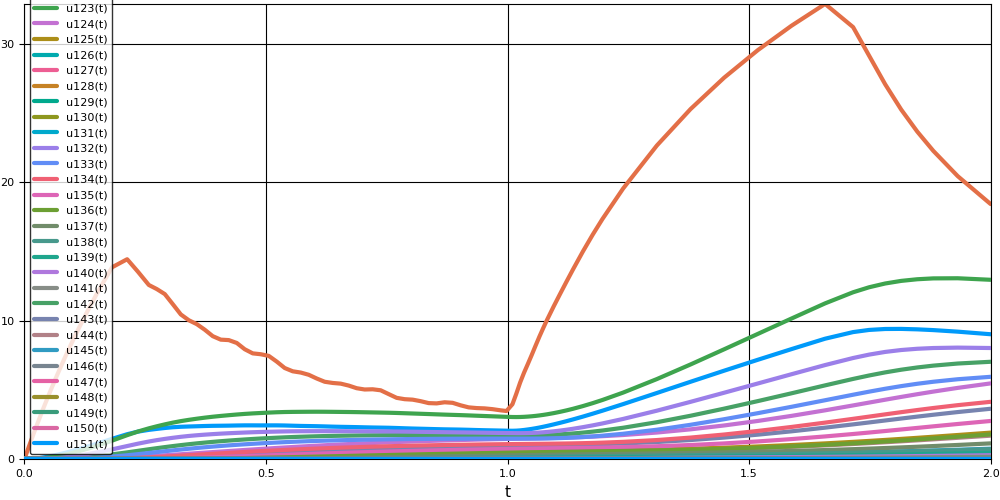

In [29]:
# global constants
micros = 10.0^-6
millis = 10.0^-3
centis = 10.0^-2

# Parameters for each of the dendrites
diameter1 = 10.0*micros
diameter2 = 20.0*micros
diameter3 = 20.0*micros
soma_diam = 50*micros

mcint_c_m = 2.0*micros*centis^2 #uFcm^2 -> F/m^2
mcint_c_md1 = pi*diameter1*mcint_c_m
mcint_c_md2 = pi*diameter2*mcint_c_m
mcint_c_md3 = pi*diameter3*mcint_c_m
soma_c_m = pi*(soma_diam/2)^2*4*mcint_c_m


mcint_r_a = 70.0*centis #ohm cm -> ohm m
mcint_r_ad1 = mcint_r_a/(pi*((diameter1/2.0)))
mcint_r_ad2 = mcint_r_a/(pi*((diameter2/2.0)))
mcint_r_ad3 = mcint_r_a/(pi*((diameter3/2.0)))
soma_r_a = mcint_r_a*2*(pi*(soma_diam/2)^3.0)/3

mcint_g_m = 0.08 # leak channel conductance
mcint_r_m = 1.0/mcint_g_m
mcint_r_md1 = mcint_r_m/(diameter1*pi)
mcint_r_md2 = mcint_r_m/(diameter2*pi)
mcint_r_md3 = mcint_r_m/(diameter3*pi)
soma_r_m = mcint_r_m/(4*pi*((soma_diam/2)^2))

mcint_resting = -82.0*millis

dx1 = 20.0*micros
dx2 = 20.0*micros
dx3 = 6.0*micros
num_comp1 = 50
num_comp2 = 50
num_comp3 = 50

# simulation parameters
start = 0.0
finish = 2.0
delta_t = 0.0001
time = collect(start:delta_t:finish)

# injected currents
inject = zeros(length(time))
target_current = 1*millis # i_inj * delta x
current = target_current/default_length
current2 = 1.0*micros

injt1 = GenRangeSeconds(0.0, 0.2, delta_t)
injt2 = GenRangeSeconds(1.0, 1.7, delta_t)
inject[injt1] = current
inject[injt2] = current

inject2 = zeros(length(time))
inject2[10000:11000] = current2


model = ns.CreateModel()
soma = ns.CreateSoma(length=soma_diam, r_m=soma_r_m, c_m=soma_c_m, r_a=soma_r_a, V_i=default_V_i)

ns.AddRoot!(model, soma)

(head1, tail1) = ns.CreateHomogenousCable(model, num_comp1, parent_id=soma.id_, length=dx1, r_m=mcint_r_md1, c_m=mcint_c_md1, r_a=mcint_r_ad1, V_i=default_V_i)
(head2, tail2) = ns.CreateHomogenousCable(model, num_comp2, parent_id=soma.id_, length=dx2, r_m=mcint_r_md2, c_m=mcint_c_md2, r_a=mcint_r_ad2, V_i=default_V_i)
(head3, tail3) = ns.CreateHomogenousCable(model, num_comp3, parent_id=soma.id_, length=dx3, r_m=mcint_r_md3, c_m=mcint_c_md3, r_a=mcint_r_ad3, V_i=default_V_i)

model.nodes_[2].I_inj_ = inject

(dV, V, A, b, soln) = ns.Simulate(model, time, delta_t)
plot(soln)


In [ ]:
   * Same, single pulse input equidistant from the cell body for each dendrite.
   * Multiple input pulses of current at equidistance from the cell body for each dendrite for several frequencies.

In [18]:
mcint_r_ad1 = mcint_r_a/(pi*((diameter1/2)^2))*100*micros*0.5
10000*delta_t

1.0

ImageMagick can be installed by executing `Pkg.add("ImageMagick")`
Will try ffmpeg, but it's lower quality...)


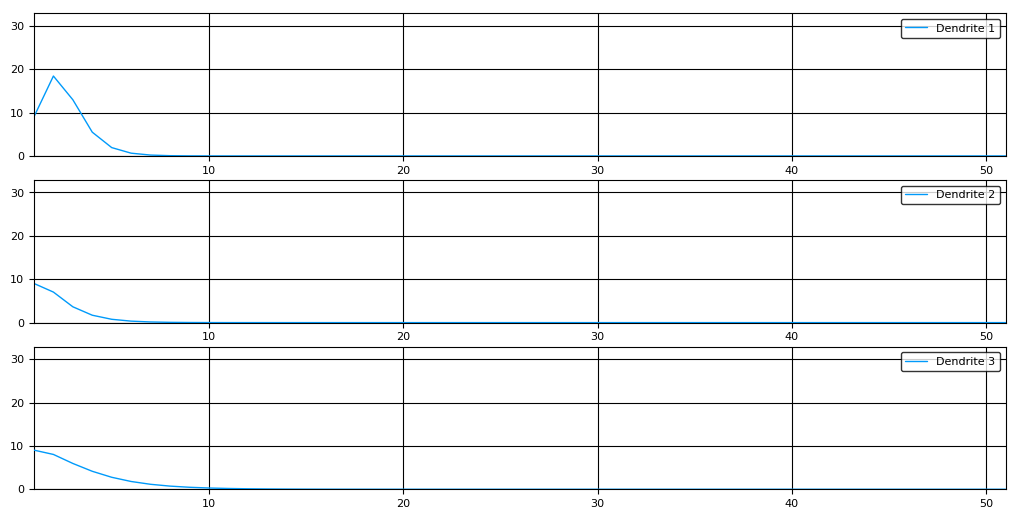

INFO: Saved animation to /media/sf_Ryan/Google Drive/Assignments/SP17/EBME433/Section 2/Model/gifs/2nYU43ulcmo=.gif


Plots.AnimatedGif("/media/sf_Ryan/Google Drive/Assignments/SP17/EBME433/Section 2/Model/gifs/2nYU43ulcmo=.gif")

In [27]:
CreateDendriteGif(soln, 2, [(1, head1, tail1), (1, head2,tail2), (1, head3, tail3)])

In [5]:
micros = 10.0^-5
millis = 10.0^-3
centis = 10.0^-2

diameter1 = 10.0*micros
diameter2 = 20.0*micros
diameter3 = 20.0*micros

mcint_c_m = 2.0*micros*centis^2 #uFcm^2 -> F/m^2
mcint_c_md1 = pi*diameter1*mcint_c_m
mcint_c_md1 = pi*diameter2*mcint_c_m
mcint_c_md1 = pi*diameter3*mcint_c_m


mcint_r_a = 70.0*centis #ohm cm -> ohm m
mcint_r_ad1 = mcint_r_a/(pi*diameter1/2)
mcint_r_ad2 = mcint_r_a/(pi*diameter2/2)
mcint_r_ad3 = mcint_r_a/(pi*diameter3/2)

mcint_g_m = 0.08 # leak channel conductance
mcint_r_m = 1.0/mcint_g_m
mcint_r_md1 = mcint_r_m/(diameter1*pi)
mcint_r_md2 = mcint_r_m/(diameter2*pi)
mcint_r_md3 = mcint_r_m/(diameter3*pi)

mcint_resting = -82.0*millis

default_length = 100.0*micros
default_r_m = mcint_r_md1
default_r_a = mcint_r_ad1
default_c_m = mcint_c_md1 #1.0/(default_length^2)
default_V_i = 0.0 #mcint_resting #1.0

#=
default_length = 1.0
default_r_m = 1.0
default_r_a = 1.0
default_c_m = 1.0
default_V_i = 0.0
=#

start = 0.0
finish = 2.0
delta_t = 0.0001
time = collect(start:delta_t:finish)
inject = zeros(length(time))
target_current = 1*millis # i_inj * delta x
current = target_current/default_length
current2 = 1.0*micros
inject[1:1000] = current
inject[10000:17000] = current

inject2 = zeros(length(time))
inject2[10000:11000] = current2


model = ns.CreateModel()
root = ns.CreateCompartment(length=default_length, r_m =default_r_m, c_m=default_c_m, r_a=default_r_a, V_i=default_V_i)

ns.AddRoot!(model, root)

ns.CreateHomogenousCable(model, 19, parent_id=1, length=default_length, r_m=default_r_m, c_m=default_c_m, r_a=default_r_a, V_i=default_V_i)
ns.CreateHomogenousCable(model, 19, parent_id=1, length=default_length, r_m=default_r_m, c_m=default_c_m, r_a=default_r_a, V_i=default_V_i)
ns.CreateHomogenousCable(model, 19, parent_id=1, length=default_length, r_m=default_r_m, c_m=default_c_m, r_a=default_r_a, V_i=default_V_i)

index = 10
model.nodes_[1].I_inj_ = inject
#model.nodes_[23].I_inj_ = inject2
#model.nodes_[43].I_inj_ = inject2

#map(ns.PrintInfo, model.nodes_)

#(dV, V, A, b, soln) = ns.Simulate(model, time, delta_t, solver=ns.RK4)
#(dV, V, A, b, soln) = ns.Simulate(model, time, delta_t)

#CreateGif(V, time, 1000, 1)
#plot(soln)
#CreateGifBuiltIn(soln, 1)
#CreateDendriteGif(soln, 1, [(1, 2, 20), (1, 21,39), (1, 40, 58)])

(
[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0],

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0],

[-0.673198 0.224399 … 0.0 0.0; 0.224399 -0.448799 … 0.0 0.0; … ; 0.0 0.0 … -0.448799 0.224399; 0.0 0.0 … 0.224399 -0.224399],

[10.0 10.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0],

DiffEqBase.ODESolution{Array{Array{Float64,1},1},Array{Float64,1},Array{Any,1},DiffEqBase.ODEProblem{Array{Float64,1},Float64,false,NeuronSim.#f#8{Array{Float64,2},Array{Float64,2},Float64,Array{Float64,1}}},Sundials.CVODE_BDF{:Newton,:Dense},DiffEqBase.##7#9}(Array{Float64,1}[[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[1.29074e-8,3.7385e-18,1.08282e-27,3.13629e-37,9.08396e-47,2.63108e-56,7.62068e-66,2.20726e-75,6.39312e-85,1.85171e-94  …  5.36329e-104,1.55343e-113,4.49936e-123,1.3032e-132,3.77458e-142,1.09327e-151,3.16656e-161,9.17165e-171,2.65648e-180,7.69425e-190],[0.

In [ ]:
micros = 10.0^-5
millis = 10.0^-3
centis = 10.0^-2

diameter1 = 10.0*micros
diameter2 = 20.0*micros
diameter3 = 20.0*micros

mcint_c_m = 2.0*micros*centis^2 #uFcm^2 -> F/m^2
mcint_c_md1 = pi*diameter1*mcint_c_m
mcint_c_md1 = pi*diameter2*mcint_c_m
mcint_c_md1 = pi*diameter3*mcint_c_m


mcint_r_a = 70.0*centis #ohm cm -> ohm m
mcint_r_ad1 = mcint_r_a/(pi*diameter1/2)
mcint_r_ad2 = mcint_r_a/(pi*diameter2/2)
mcint_r_ad3 = mcint_r_a/(pi*diameter3/2)

mcint_g_m = 0.08 # leak channel conductance
mcint_r_m = 1.0/mcint_g_m
mcint_r_md1 = mcint_r_m/(diameter1*pi)
mcint_r_md2 = mcint_r_m/(diameter2*pi)
mcint_r_md3 = mcint_r_m/(diameter3*pi)

mcint_resting = -82.0*millis

default_length = 100.0*micros
default_r_m = mcint_r_md1
default_r_a = mcint_r_ad1
default_c_m = mcint_c_md1 #1.0/(default_length^2)
default_V_i = 0.0 #mcint_resting #1.0

#=
default_length = 1.0
default_r_m = 1.0
default_r_a = 1.0
default_c_m = 1.0
default_V_i = 0.0
=#

start = 0.0
finish = 2.0
delta_t = 0.0001
time = collect(start:delta_t:finish)
inject = zeros(length(time))
target_current = 1*millis # i_inj * delta x
current = target_current/default_length
current2 = 1.0*micros
inject[1:1000] = current
inject[10000:17000] = current

inject2 = zeros(length(time))
inject2[10000:11000] = current2


model = ns.CreateModel()
root = ns.CreateCompartment(length=default_length, r_m =default_r_m, c_m=default_c_m, r_a=default_r_a, V_i=default_V_i)

ns.AddRoot!(model, root)

ns.CreateHomogenousCable(model, 19, parent_id=1, length=default_length, r_m=default_r_m, c_m=default_c_m, r_a=default_r_a, V_i=default_V_i)
ns.CreateHomogenousCable(model, 19, parent_id=1, length=default_length, r_m=default_r_m, c_m=default_c_m, r_a=default_r_a, V_i=default_V_i)
ns.CreateHomogenousCable(model, 19, parent_id=1, length=default_length, r_m=default_r_m, c_m=default_c_m, r_a=default_r_a, V_i=default_V_i)

index = 10
model.nodes_[1].I_inj_ = inject
#model.nodes_[23].I_inj_ = inject2
#model.nodes_[43].I_inj_ = inject2

#map(ns.PrintInfo, model.nodes_)

#(dV, V, A, b, soln) = ns.Simulate(model, time, delta_t, solver=ns.RK4)
#(dV, V, A, b, soln) = ns.Simulate(model, time, delta_t)

#CreateGif(V, time, 1000, 1)
#plot(soln)
#CreateGifBuiltIn(soln, 1)
#CreateDendriteGif(soln, 1, [(1, 2, 20), (1, 21,39), (1, 40, 58)])